# EDA
Explore the color space of the images, at the end will be discovered.

* Check will color are similar to each other
* What attributes are representatives of each color
* Verify if features is normal distributed.


## Packages

In [10]:
from pathlib  import Path
import pandas as pd
import pyprojroot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Paths

In [3]:
root_path =  pyprojroot.here()
data_processed_folder = (root_path / "data"/'processed')

* Read dataframe

In [4]:
df = pd.read_csv(data_processed_folder/'pictures.csv')

## Inspect dataframe

In [6]:
df.describe()

,b_bgr_mean,g_bgr_mean,r_bgr_mean,h_hsv_mean,s_hsv_mean,v_hsv_mean,l_lab_mean,a_lab_mean,b_lab_mean,b_bgr_std,g_bgr_std,r_bgr_std,h_hsv_std,s_hsv_std,v_hsv_std,l_lab_std,a_lab_std,b_lab_std,index
count,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000
mean,88.562518,104.320254,115.244547,44.757007,101.677815,125.833029,112.543182,131.292713,138.968521,43.541036,45.857044,49.950760,30.433746,47.596255,47.837746,46.549118,8.016554,11.474257,8165.315063
std,46.991514,44.884307,45.970239,28.585814,41.647015,47.033807,45.130903,9.447764,12.528708,17.234010,15.383316,15.864959,18.001806,16.859403,15.040795,14.648113,5.548018,6.335095,4720.507435
min,1.719447,0.551342,3.557718,0.094689,0.000821,14.424922,8.323479,85.348392,74.034846,1.658205,0.849352,4.797930,0.519165,0.036974,3.973172,1.867568,0.000000,0.004587,0.000000
25%,50.735355,68.037886,79.664128,21.500999,72.663328,88.019296,76.606588,126.544998,132.443134,30.983045,35.195289,39.161896,15.849682,36.092367,37.697551,36.490425,4.173367,7.135976,4077.500000
50%,78.795156,99.416758,110.351822,35.415937,99.178078,124.869329,110.097046,130.334378,138.904006,41.767769,44.690731,49.116085,28.497717,46.342700,47.336775,45.620704,6.405536,10.066981,8159.000000
75%,121.101738,135.918578,146.016455,62.570007,128.157657,160.841375,144.690735,134.671555,145.831769,54.259380,55.179691,59.893537,42.317307,58.134285,57.375365,55.603774,10.130846,14.351203,12239.500000
max,242.331433,246.315693,252.507049,175.069186,254.542063,252.507049,246.765529,196.528596,205.006144,120.384983,113.409431,117.611042,87.644569,123.582951,110.898472,113.895517,44.177430,86.872675,16347.000000


* All features are between [0-255] what it is correct based in color space theory.

In [7]:
df.isnull().sum()

filename      0
b_bgr_mean    0
g_bgr_mean    0
r_bgr_mean    0
h_hsv_mean    0
s_hsv_mean    0
v_hsv_mean    0
l_lab_mean    0
a_lab_mean    0
b_lab_mean    0
b_bgr_std     0
g_bgr_std     0
r_bgr_std     0
h_hsv_std     0
s_hsv_std     0
v_hsv_std     0
l_lab_std     0
a_lab_std     0
b_lab_std     0
image         0
page          0
color         0
index         0
dtype: int64

Non null values :)

## EDA

In [41]:
def boxplot(df,channels:list[str],title='title'):
    df_by_channels = pd.melt(df, id_vars='color', value_vars=channels,var_name='channel')
    df_by_channels['channel'] = df_by_channels['channel'].str[0:1].str.capitalize()
    myorder =df_by_channels.groupby(by=["color"]).median().reset_index().sort_values(by='value')['color']
    plt.figure(figsize=(15, 8))
    plt.title(title)
    sns.boxplot(data=df_by_channels, x="color", y="value", hue='channel',order=myorder)

/tmp/ipykernel_116370/303764046.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  myorder =df_by_channels.groupby(by=["color"]).median().reset_index().sort_values(by='value')['color']


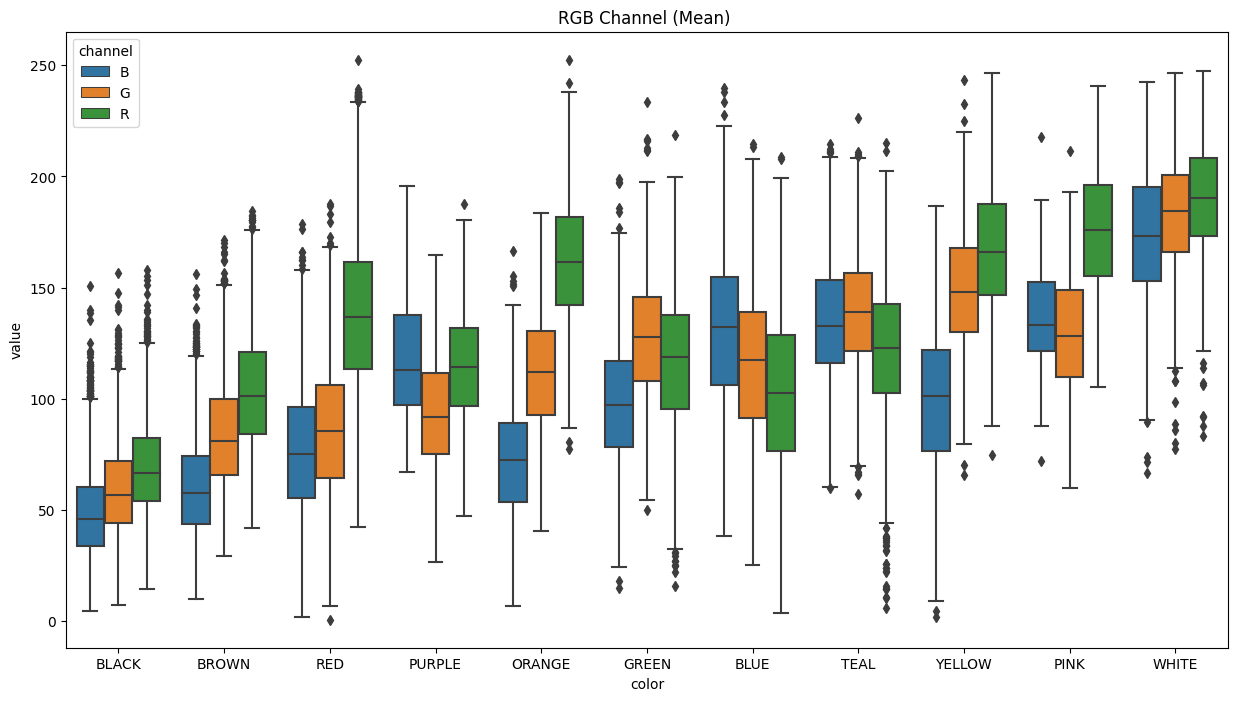

In [44]:
boxplot(df,['b_bgr_mean','g_bgr_mean','r_bgr_mean'],'RGB Channel (Mean) ')

/tmp/ipykernel_116370/303764046.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  myorder =df_by_channels.groupby(by=["color"]).median().reset_index().sort_values(by='value')['color']


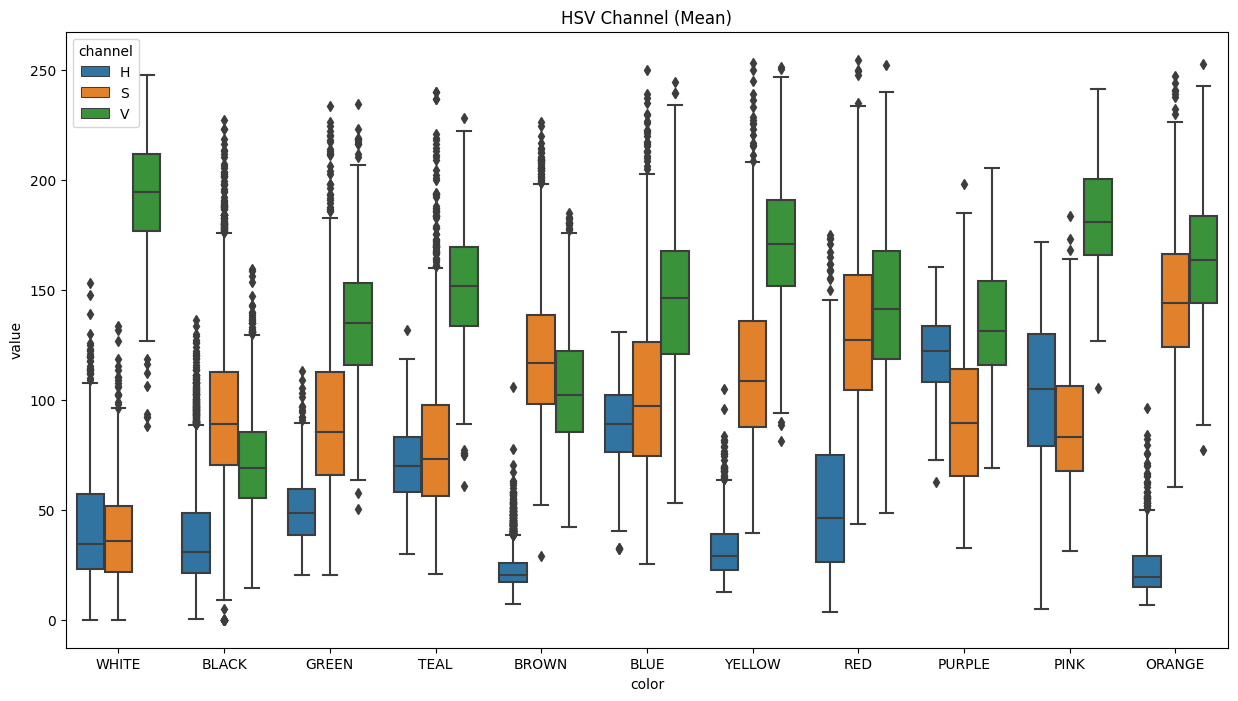

In [45]:
boxplot(df,['h_hsv_mean','s_hsv_mean','v_hsv_mean'],'HSV Channel (Mean)')

In [ ]:
sns.swarmplot(data=df, x="b_bgr_mean", y="color", size=0.7)


In [12]:
df[['b_bgr_mean','color']]

,b_bgr_mean,color
0,131.881534,BLUE
1,65.752567,BROWN
2,74.711220,ORANGE
3,41.967869,BLACK
4,56.423428,BLACK
...,...,...
16306,161.425217,BLUE
16307,91.198174,BROWN
16308,161.193208,TEAL
16309,164.557297,WHITE


In [7]:
#black = df[df['color']=='ORANGE']
black = df

In [19]:
black

,filename,b_bgr_mean,g_bgr_mean,r_bgr_mean,h_hsv_mean,s_hsv_mean,v_hsv_mean,l_lab_mean,a_lab_mean,b_lab_mean,...,h_hsv_std,s_hsv_std,v_hsv_std,l_lab_std,a_lab_std,b_lab_std,image,page,color,index
0,2936.jpg,131.881534,93.424017,29.916042,103.393780,217.222161,138.803320,98.520747,126.090249,102.784888,...,19.683627,49.435556,32.906754,32.637751,17.765795,18.998403,https://lh3.googleusercontent.com/ci/AC_FhM_Ub...,https://artsandculture.google.com/asset/the-lo...,BLUE,2936
1,10356.jpg,65.752567,93.429152,108.561169,27.130103,105.862238,111.318639,101.503451,130.187442,146.235670,...,17.766126,47.946678,54.994613,52.942038,10.038349,9.736178,https://lh3.googleusercontent.com/ci/AC_FhM_F2...,https://artsandculture.google.com/asset/a-spir...,BROWN,10356
2,7655.jpg,74.711220,105.099318,139.372485,20.842374,101.887004,139.683823,120.625957,137.489332,150.600602,...,9.881929,52.370741,56.181306,37.231280,15.548931,12.878623,https://lh3.googleusercontent.com/ci/AC_FhM-gX...,https://artsandculture.google.com/asset/edmund...,ORANGE,7655
3,15849.jpg,41.967869,44.120360,39.470688,68.533436,79.039054,48.895295,42.990973,125.795472,128.879913,...,29.759100,40.859004,40.823119,41.407015,3.950034,6.880363,https://lh3.googleusercontent.com/ci/AC_FhM_K4...,https://artsandculture.google.com/asset/portra...,BLACK,15849
4,14497.jpg,56.423428,77.232283,93.434896,15.559275,106.463745,93.446196,81.492530,131.856346,141.928057,...,19.518316,36.499210,79.204950,76.356248,3.770236,12.149282,https://lh3.googleusercontent.com/ci/AC_FhM-kg...,https://artsandculture.google.com/asset/a-woma...,BLACK,14497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16306,3131.jpg,161.425217,125.836356,96.209115,102.554436,137.168778,173.177847,132.736617,131.594352,106.834610,...,32.412803,59.042928,54.803532,60.954770,16.272360,24.555870,https://lh3.googleusercontent.com/ci/AC_FhM-0M...,https://artsandculture.google.com/asset/renewa...,BLUE,3131
16307,9387.jpg,91.198174,107.224118,120.253556,20.629177,63.418925,120.553952,117.247012,130.446974,138.930582,...,19.414917,23.149826,25.260871,23.801078,3.136150,4.670063,https://lh3.googleusercontent.com/ci/AC_FhM-qh...,https://artsandculture.google.com/asset/the-ba...,BROWN,9387
16308,5177.jpg,161.193208,155.540022,146.897757,90.538801,42.812937,167.311821,160.878966,126.642055,124.279038,...,36.147341,33.075517,58.164300,56.516321,7.406085,7.903368,https://lh3.googleusercontent.com/ci/AC_FhM-Gz...,https://artsandculture.google.com/asset/ideal-...,TEAL,5177
16309,102.jpg,164.557297,177.798291,177.949099,32.714439,30.873159,180.720499,181.661645,125.784825,134.939652,...,15.407879,32.657645,66.763639,66.346510,4.510445,6.034761,https://lh3.googleusercontent.com/ci/AC_FhM90X...,https://artsandculture.google.com/asset/the-bo...,WHITE,102


AttributeError: Line2D.set() got an unexpected keyword argument 'opacity'

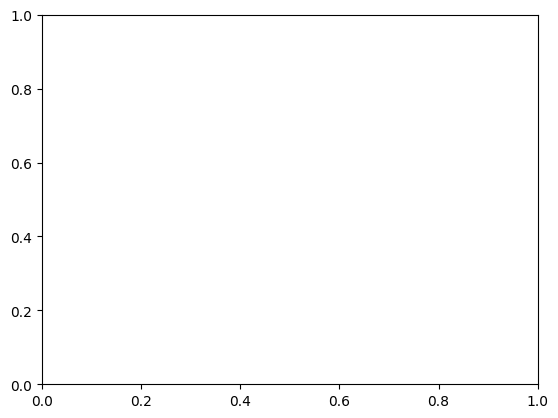

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
#black['r_bgr_mean'].plot(kind='hist')
black['r_bgr_mean'].plot(kind='kde',opacity=0.5)
plt.show()
#black['b_bgr_mean'].plot(kind='kde')
#black['g_bgr_mean'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

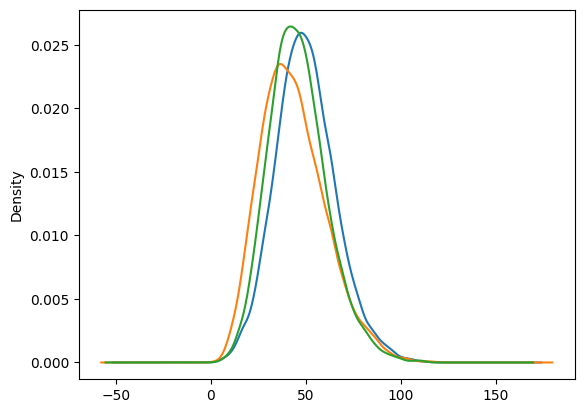

In [22]:
black['r_bgr_std'].plot(kind='kde')
black['b_bgr_std'].plot(kind='kde')
black['g_bgr_std'].plot(kind='kde')